In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
# use the qasm_simulator from Aer
simulator = QasmSimulator()

In [3]:
#create quantum circuit acting on the q register
circuit = QuantumCircuit(2,2)

# add Hadamard gate on qubit 0
circuit.h(0)

# CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0,1)

In [4]:
# map the measurement to classical bits
circuit.measure([0,1],[0,1])

In [13]:
# compile the circuit down to low-level QASM instructions
# which are supported by the backend
compiled_circuit = transpile(circuit, simulator)

# execute circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots = 1000)

# grab results
result = job.result()

In [19]:
# return the counts
counts = result.get_counts(circuit)

print(f"Total count for 00 and 11: {counts}")

Total count for 00 and 11: {'00': 531, '11': 469}


In [15]:
type(counts)

qiskit.result.counts.Counts

In [20]:
# draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

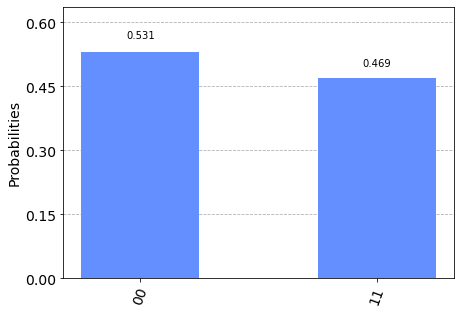

In [21]:
# plot a histogram
plot_histogram(counts)